# SOM example for video



In [31]:
require(kohonen)

In [32]:
# Get data (fairly small data set)
data_safe = read.csv("original_data.csv",header=TRUE)
data = cbind(data_safe)
print(paste0("Frame has ",dim(data)[1]," observations"))
head(data)

[1] "Frame has 100 observations"


x,z,y,class,id
0.878749400,-1.5368920,-0.9525772,1,0
0.569173625,-1.2066344,-0.4724550,1,1
0.001386812,0.1950917,-0.8623742,0,2
0.162436949,-1.0524443,-0.3823317,1,3
0.895546216,-1.4544356,-0.2996867,1,4
0.303015058,0.2638460,-1.0238812,0,5


In [33]:
# Get all axogenous variables
X = as.matrix(data[,-4:-5])
head(X)

x,z,y
0.878749400,-1.5368920,-0.9525772
0.569173625,-1.2066344,-0.4724550
0.001386812,0.1950917,-0.8623742
0.162436949,-1.0524443,-0.3823317
0.895546216,-1.4544356,-0.2996867
0.303015058,0.2638460,-1.0238812


[1] 0.8267946
[1] 1.151646


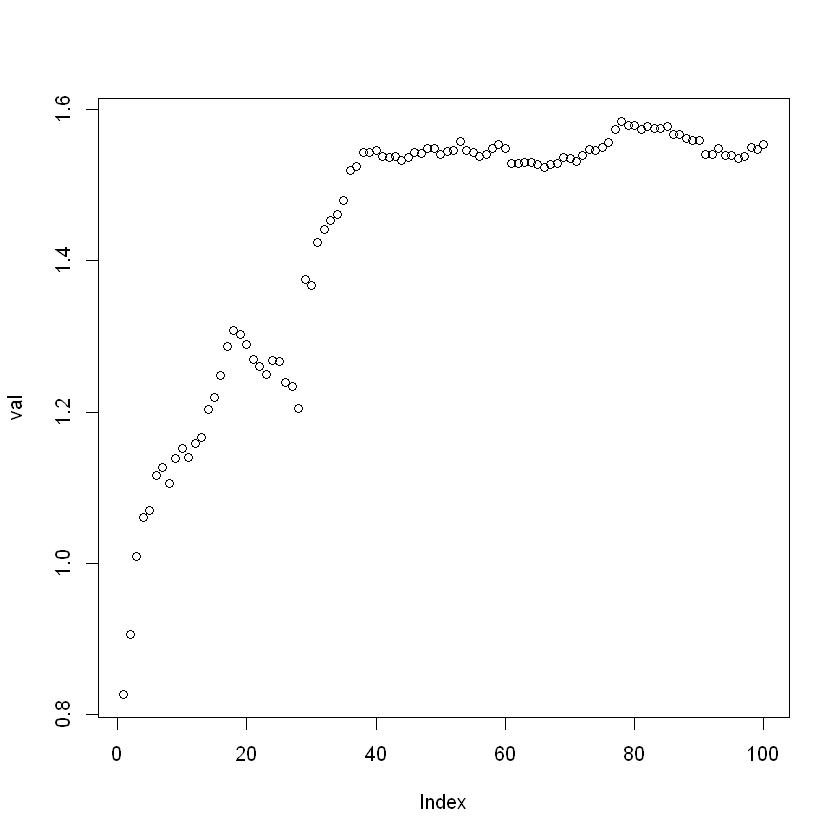

In [35]:
iters = 100
g = somgrid(xdim = 3, ydim = 3, topo = "rectangular")
codes = vector("list",iters)
for (l in 1:iters){
    set.seed(222)
    map = som(X,grid=g,alpha=c(0.05,0.01), radius=1, rlen = l)
    codes[[l]] = as.data.frame(getCodes(map))
}

iterno = 10; nodeno = 6
print(codes[[1]]$x[nodeno])
print(codes[[iterno]]$x[nodeno])

val = c()
for (i in 1:iters){
    val = c(val, codes[[i]]$x[nodeno])
}

plot(val)

In [36]:
ff = data.frame()
for(i in 1:length(codes)){
    gg = codes[[i]]
    gg[['id']] = paste0("point_",0:(nrow(gg) - 1))
    gg[['iter']] = i
    ff = rbind(ff, gg)
}
write.csv(ff, file = "codes.csv", row.names=F)    
